# Week 2.  Probability and Statistics review

Welcome back! We will continue with the review of concepts from Probability and Statistics. 

Let's do a few imports for a start...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special
%matplotlib inline

## Part 1 - Well-known probability distributions

In this lecture, we talk about a few probability density functions. Let's define them. Take a careful look at the expressions, and the parameters.

In [2]:
def normpdf(x, mu, sigma):
    return 1/(math.sqrt(2*math.pi)*sigma)*math.exp(-1.0/2*(mu-x)**2/(sigma**2))
def poispdf(x, lamb):
    return lamb**x*math.exp(-lamb)/math.factorial(x)
def exppdf(x, lamb):
    return lamb*math.exp(-lamb*x)
def betapdf(x, Alpha, Beta):
    Bx=scipy.special.beta(Alpha, Beta)
    return x**(Alpha-1)*(1-x)**(Beta-1)/Bx


Notice that these function exists in many other Python packages, you don't need to redefine them all the time...

It's very useful to plot them, as we do below (this is the code used to generate the pictures in the slides)

First, the **Gaussian**

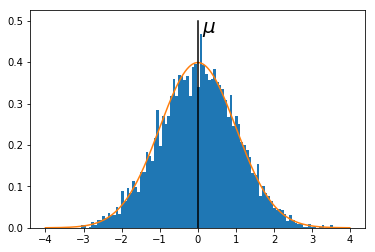

In [3]:
X=np.arange(-4, 4, 0.01)
L=np.random.normal(size=5000)
mu=0
sigma=1
Y=np.array([normpdf(x, mu, sigma) for x in X])
plt.hist(L, bins=100, normed=True)
plt.plot(X,Y)
plt.plot([mu, mu], [0,.5], c="black")
plt.annotate(s="$\mu$",xy=(mu+.1,.47), size=20);

Now, the **Poisson** 

(try to use the parameters "bins=..." in the plt.hist call)

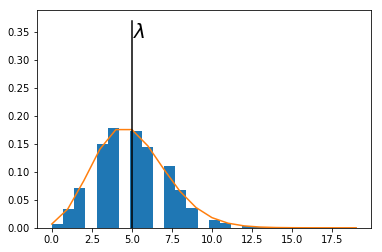

In [4]:
X=range(0,20)
lamb=5
L=np.random.poisson(lamb, size=5000)
Y=np.array([poispdf(x, lamb) for x in X])
weights = np.ones_like(L)/float(len(L))
plt.hist(L,weights=weights, bins=20)
plt.plot(X,Y);
plt.plot([lamb, lamb], [0,.37], c="black")
plt.annotate(s="$\lambda$",xy=(lamb+.1,.34), size=20);

Let's try the **exponential**

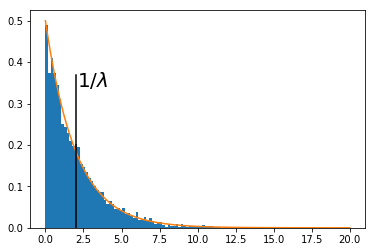

In [5]:
X=np.arange(0,20, 0.01)
lamb=.5
L=np.random.exponential(1/lamb, size=5000)
Y=np.array([exppdf(x, lamb) for x in X])
plt.hist(L, bins=100, normed=True)
plt.plot(X,Y);
plt.plot([1/lamb, 1/lamb], [0,.37], c="black")
plt.annotate(s="$1/\lambda$",xy=(1/lamb+.1,.34), size=20);

And finally, the **Beta**

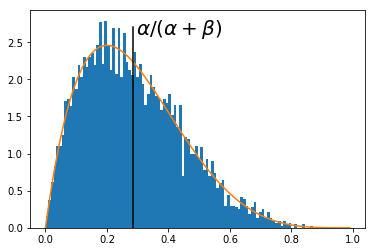

In [6]:
X=np.arange(0,1, 0.01)
Alpha=2
Beta=5
L=np.random.beta(Alpha, Beta, size=5000)
Y=np.array([betapdf(x, Alpha, Beta) for x in X])
plt.hist(L, bins=100, normed=True)
plt.plot(X,Y);#
m=Alpha/(Alpha+Beta)
plt.plot([m, m], [0,2.7], c="black")
plt.annotate(s="$\\alpha/(\\alpha+\\beta)$",xy=(m+.01,2.6), size=20);

**The Central limit theorem**

A very important theorem in all statistics is called the Central Limit Theorem, which says that 

> The distribution of the sampling means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution.

Try to test yourself the Central Limit Theorem. Essentially, generate multiple random datasets, each time following the same parameters, and a probability density function (pdf) of your choice. Test with each of the pdfs created above. 

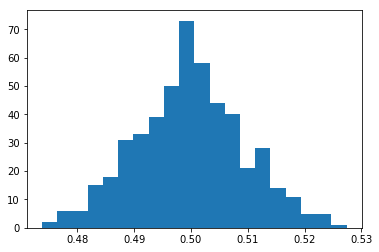

In [7]:
N=500
sample_means=[]
for n in range(N):
    L=np.random.poisson(lamb, size=5000)
    sample_means.append(L.mean())

plt.hist(sample_means, bins=20);

We will now work with bivariate distributions, i.e. instead of having on value at a time, we have two. 

Let's use the Bivariate normal distribution for it

In [8]:
X=np.random.multivariate_normal([0,0], [[1,.6],[.6, 1]], size=5000)

Let's check the second parameter (in this case, the list [[1,.6],[.6, 1]]). It corresponds to the covariance matrix of the normal distribution. 

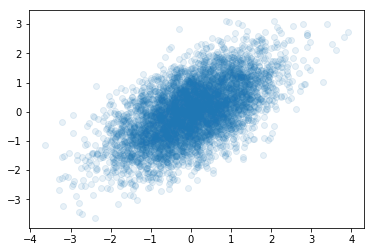

In [9]:
plt.scatter(X[:,0], X[:,1], alpha=0.1)

Try changing the values of that matrix, and see the results...

Just to make sure you don't make mistakes in the future, notice that the code below is ONLY for a covariance matrix of independent normal variables. 

In [10]:
X=np.random.normal(loc=0, scale=1, size=[5000,2])

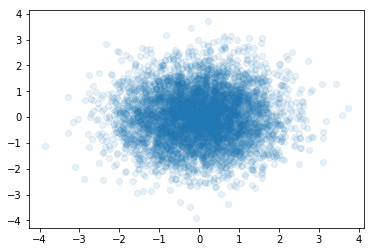

In [11]:
plt.scatter(X[:,0], X[:,1], alpha=0.1)

----

## Part 2 - Maximum Loglikelihood

Time now to work on the concept of maximum loglikelihood, a fundamental one in statistical modeling. 

Let's create a dataset...

In [12]:
P=np.random.normal(loc=4.5, scale=3, size=1000)

Now, let's follow the slides, and create the function that returns the Gaussian loglikelihood of a dataset, given a pair of parameters:

$-\frac{n}{2} (log(2\pi)+log(\sigma^2) -\frac{1}{2\sigma^2}\sum_i (x_i-\mu)^2$

Confirm that the function has no mistake...

In [13]:
def loglikelihood(P, mu, sigma):
    n=len(P)
    s=sum([(xi-mu)**2 for xi in P])
    return -n/2*(math.log(2*math.pi)+math.log(sigma**2))-1/(2*sigma**2)*s

So, we want to find the values of $\mu$ and $\sigma$ that maximize that function in our dataset... Do you want to try to find them? A simple way is to try MANY such values. Go ahead!

In [14]:
MUs=np.arange(-10, 10, 0.1)
SIGMAs=np.arange(0.1,10, 0.1)

In [16]:
max_ll=-9999999999
max_mu=0
max_sigma=1
for mu in MUs:
    for sigma in SIGMAs:
        ll=loglikelihood(P, mu, sigma)
        if ll>max_ll:
            max_ll=ll
            max_mu=mu
            max_sigma=sigma
print("μ=%f"%max_mu)
print("σ=%f"%max_sigma)


μ=4.600000
σ=2.900000


Compare the values you obtained with the sample mean and sample variance.

As mentioned in the lecture, this task falls in the realm of Optimization. Python also has tools for optimizing a function, which is much more clever than blindly trying many values for $\mu$ and $\sigma$. We will not explore them here, but in case you're curious, just try the methods in:
> scipy.optimize

Now, just for illustration, let's try a case where the data comes from a combination (a _mixture_) of two different distributions.

In [17]:
L1=np.random.normal(loc=4.5, scale=3, size=1000)
L2=np.random.normal(loc=-5, scale=2, size=1000)
L=np.concatenate((L1,L2))

Plot the respective histogram...

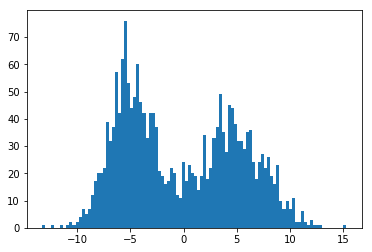

In [18]:
plt.hist(L, bins=100);

Just getting the mean and standard deviation, assuming a single Gaussian would be mistake...

In [19]:
max_ll=-9999999999
max_mu=0
max_sigma=1
for mu in MUs:
    for sigma in SIGMAs:
        ll=loglikelihood(L, mu, sigma)
        if ll>max_ll:
            max_ll=ll
            max_mu=mu
            max_sigma=sigma
print("μ=%f"%max_mu)
print("σ=%f"%max_sigma)



μ=-0.200000
σ=5.400000


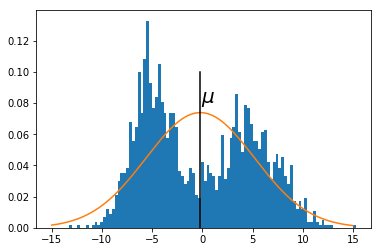

In [20]:
X=np.arange(-15, 15, 0.01)
Y=np.array([normpdf(x, max_mu, max_sigma) for x in X])
plt.hist(L, bins=100, normed=True)
plt.plot(X,Y)
plt.plot([max_mu, max_mu], [0,.1], c="black")
plt.annotate(s="$\mu$",xy=(max_mu+.1,.08), size=20);

Homework: Do you want to try estimating these TWO gaussians at the same time? TIP: search for "Mixture Models"